# PWM of a signal

In [1]:
from scipy import signal
from scipy.fft import fft, fftfreq
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
from matplotlib import rcParams
rcParams["font.serif"] = "cmr14"
rcParams['savefig.dpi'] = 300
rcParams["figure.dpi"] = 100
rcParams.update({'font.size': 18})
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0

In [2]:
N = 4096
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1/dt
w_pwm = 50 # lower rate used by TX/RC - CPUS use 490Hz

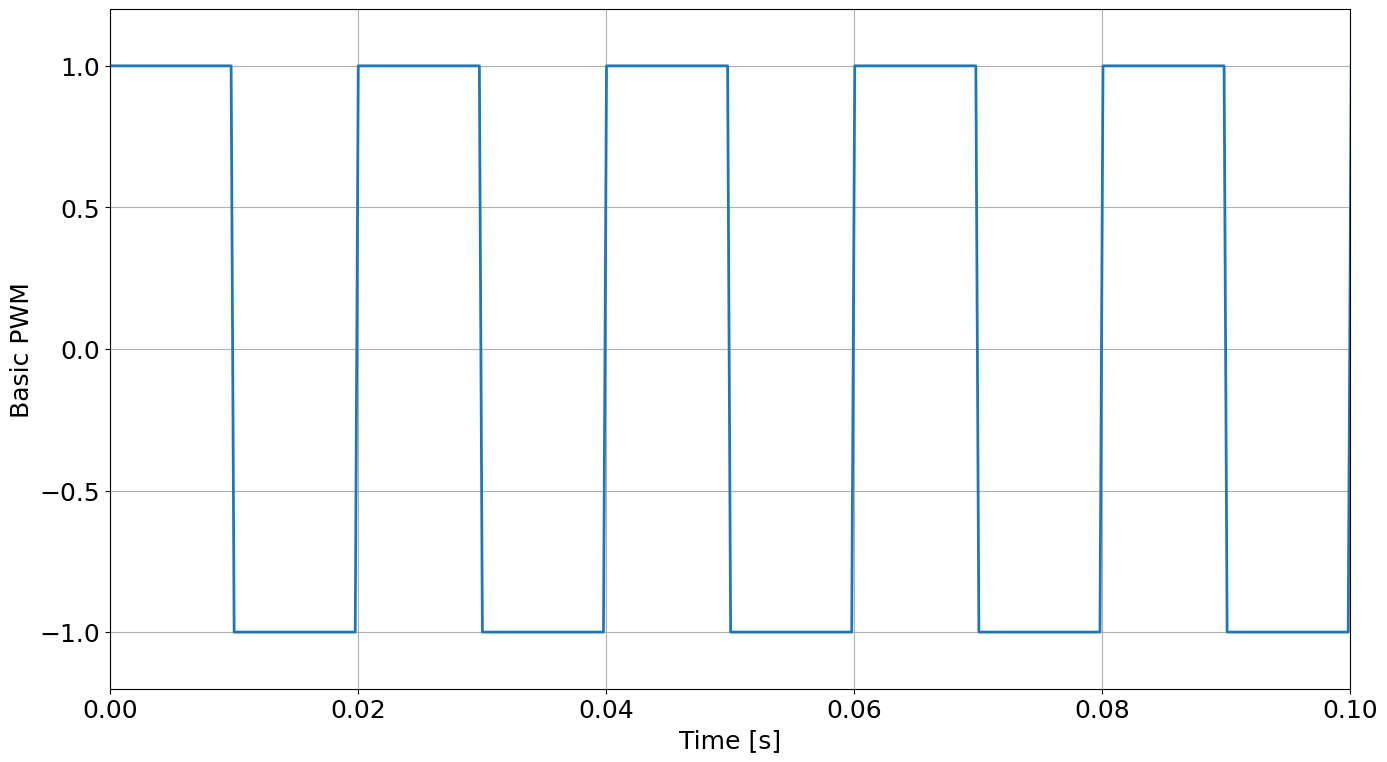

In [4]:
fig, ax = plt.subplots()
plt.plot(t, signal.square(2 * np.pi * w_pwm * t))
plt.ylim(-1.2, 1.2)
plt.xlim(0, 0.1)
plt.xlabel('Time [s]')
plt.ylabel('Basic PWM')
plt.show()
fig.savefig('./data/PWM1.png', dpi=300)


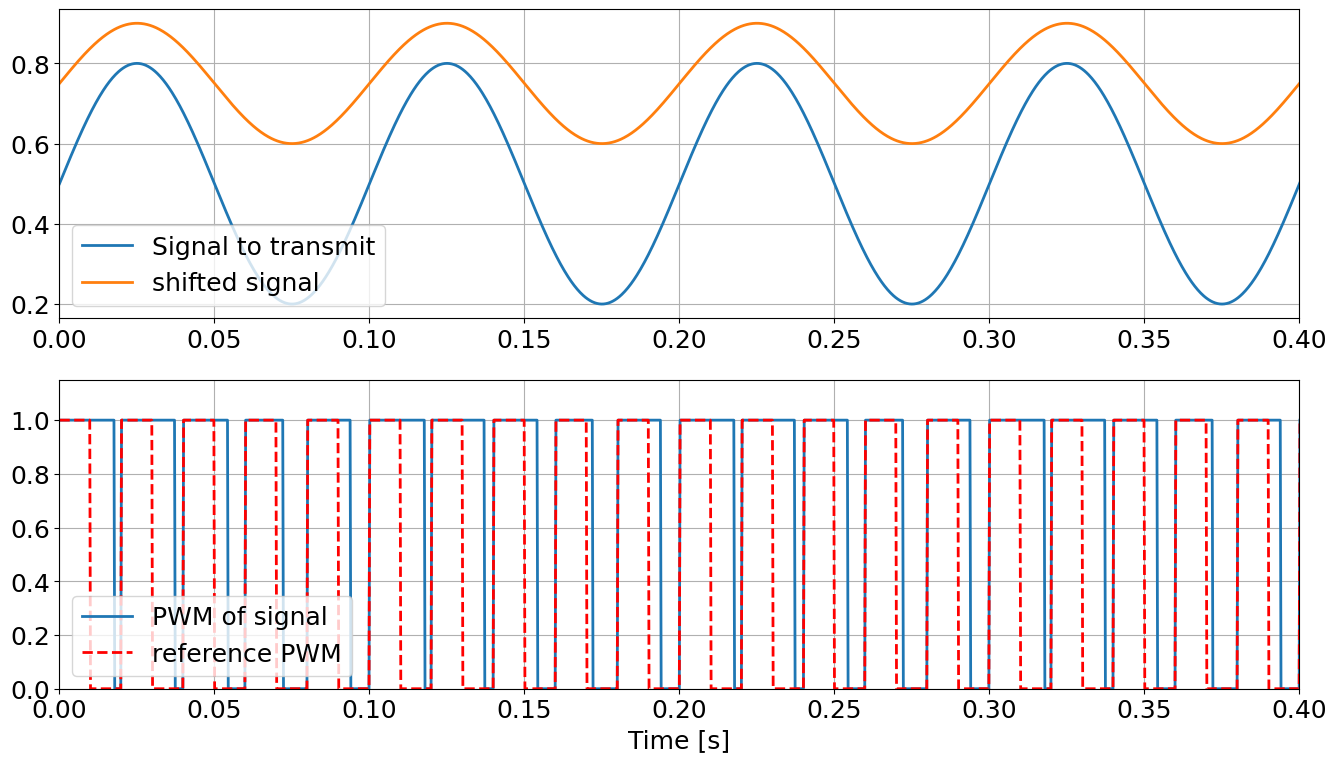

In [5]:
# Freq of signal to transmit
w0 = 10

# Signal
sig = 0.3*np.sin(2 * np.pi * w0 * t) + 0.5
# scale/shift to 0.5-1
sig2 = (sig + 1)/2

# PWM of signal
pwm = 0.5*signal.square(2 * np.pi * w_pwm * t, duty=sig2) + 0.5
# ref PWM
pwm_zero = 0.5*signal.square(2 * np.pi * w_pwm * t, duty=0.5) + 0.5

fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
plt.plot(t, sig, t, sig2)
plt.legend(['Signal to transmit','shifted signal'])
plt.xlim(0, 0.4)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.plot(t, pwm_zero,'r--')
plt.ylim(0, 1.15)
plt.xlim(0, 0.4)
plt.legend(['PWM of signal','reference PWM'],loc='best')
plt.xlabel('Time [s]')
plt.show()
fig.savefig('./data/PWM2.png', dpi=300)


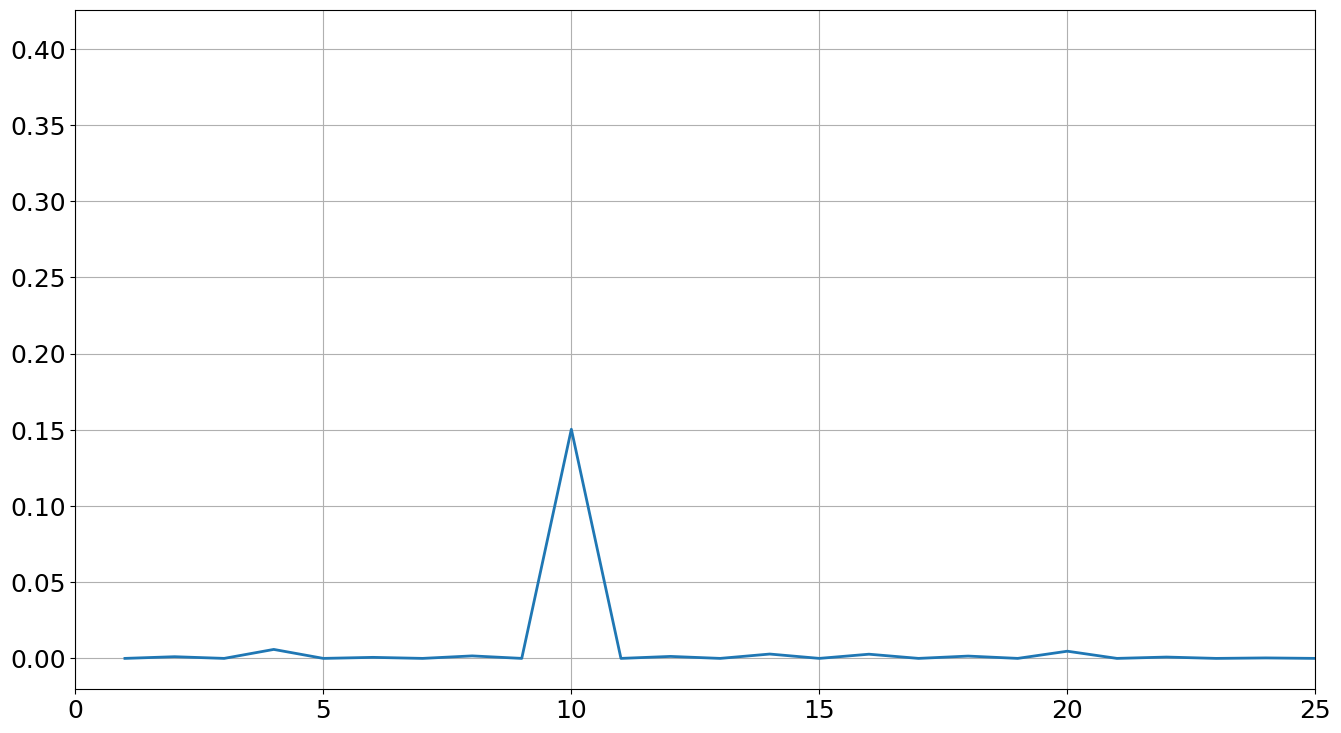

In [6]:
# Check freq content of the PWM signal
yf = fft(pwm)
ff = fftfreq(N, 1/fs)[1:N//2]

fig, ax = plt.subplots()
plt.plot(ff, 2.0/N * np.abs(yf[1:N//2]))
plt.xlim([0, w_pwm/2])
plt.grid(True)
plt.show()
fig.savefig('./data/PWM3.png', dpi=300)
